In [152]:
import numpy as np
from scipy.sparse.linalg import eigsh
import scipy.sparse as sparse
from scipy.linalg import eigh
import scipy.linalg
import matplotlib.pyplot as plt
from qutip import *
import math

In [153]:
#plt.rcParams['figure.figsize']=8.5,5.1
plt.rcParams['font.size']=20
plt.rcParams['lines.linewidth']=1.5
plt.rcParams['text.usetex']=True

In [154]:
#Construction of necessary elements of theta and phi Hilbert spaces

# For phi

N=50
a_phi=np.diag(np.sqrt(np.arange(1, N+1)), 1)
ad_phi=np.diag(np.sqrt(np.arange(1, N+1)), -1)
N_phi=ad_phi@a_phi
Id_N=np.eye(N+1)

# For theta

M=20
Id_M=np.eye(2*M+1)
n_theta=np.flipud(np.fliplr(np.diag(np.arange(-M,M+1), 0)))

#Values of equilibrium

phi_ext_val=np.pi
ng_val=0.5

#Qubit parameters 1 

E_Cs=1.0
E_Cj=1.0
E_L=1.0
E_J=1.0
alpha=(1j*(E_Cj/E_L)**(1.0/4.0))

# Qubit parameters 2

E_Cs_2=(1.0/20)
E_Cj_2=1.0
E_L_2=(1.0/16)
E_J_2=(1.0/5.0)
alpha2=(1j*(E_Cj_2/E_L_2)**(1.0/4.0))



In [294]:
#1ST VALUES

#OJOOOO SE CAMBIA CON CADA SET OF VALUES
epsilon_n=0.01*0.5
epsilon_phi=(0.022776*np.pi)

#T=200*1/0.083
T=30*1/0.00195092           #5.5*1/0.00195092
print(T)
#N_time=10000
N_time=120
Delta_t=T/N_time
print(Delta_t)
time_array=np.linspace(Delta_t,T,N_time)
print(time_array)

15377.36042482521
128.14467020687675
[  128.14467021   256.28934041   384.43401062   512.57868083
   640.72335103   768.86802124   897.01269145  1025.15736166
  1153.30203186  1281.44670207  1409.59137228  1537.73604248
  1665.88071269  1794.0253829   1922.1700531   2050.31472331
  2178.45939352  2306.60406372  2434.74873393  2562.89340414
  2691.03807434  2819.18274455  2947.32741476  3075.47208497
  3203.61675517  3331.76142538  3459.90609559  3588.05076579
  3716.195436    3844.34010621  3972.48477641  4100.62944662
  4228.77411683  4356.91878703  4485.06345724  4613.20812745
  4741.35279765  4869.49746786  4997.64213807  5125.78680828
  5253.93147848  5382.07614869  5510.2208189   5638.3654891
  5766.51015931  5894.65482952  6022.79949972  6150.94416993
  6279.08884014  6407.23351034  6535.37818055  6663.52285076
  6791.66752096  6919.81219117  7047.95686138  7176.10153159
  7304.24620179  7432.390872    7560.53554221  7688.68021241
  7816.82488262  7944.96955283  8073.11422303  82

In [5]:
# Construction of the 0-pi Hamiltonian

def timedep_Hamiltonian_0pi_for_ng(EJ,ECS,ECJ,EL,n,phi,alph,time):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #print("H =>",len(H))
    #Free Hamiltonian construction
    omega=np.pi/T
    n_t=n-epsilon_n*np.cos(omega*time)
    H1=4*ECS*((n_theta-n_t*Id_M)@(n_theta-n_t*Id_M))
    H_theta=np.kron(H1,Id_N)
    #print("H_theta =>",len(H_theta))
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=np.kron(Id_M,H2)
    #print("H_phi =>",len(H_phi))
    H_0=H_theta+H_phi
    #print("H_0 =>",len(H_0))
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta_ext=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta_ext[0][2*M]+=1
    cos_theta_ext[2*M][0]+=1
    phi_ext_t=phi-epsilon_phi*np.sin(omega*time)
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi_ext_t/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi_ext_t/2)))
    H_I=EJ*np.kron(cos_theta_ext,cos_phi.real)#SIN EL2 
    #print("H_I =>",len(H_I))
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    #print("H =>",len(H))
    H+=H_0-H_I
    #print("H =>",len(H))
    return H

In [6]:
# Construction of the 0-pi Hamiltonian

def timedep_Hamiltonian_0pi_for_phiext(EJ,ECS,ECJ,EL,n,phi,alph,time):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Free Hamiltonian construction
    omega=np.pi/T
    n_t=n-epsilon_n*np.sin(omega*time)
    H1=4*ECS*((n_theta-n_t*Id_M)@(n_theta-n_t*Id_M))
    H_theta=np.kron(H1,Id_N)
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=np.kron(Id_M,H2)
    H_0=H_theta+H_phi
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta_ext=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta_ext[0][2*M]+=1
    cos_theta_ext[2*M][0]+=1
    phi_ext_t=phi-epsilon_phi*np.cos(omega*time)
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi_ext_t/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi_ext_t/2)))
    H_I=EJ*np.kron(cos_theta_ext,cos_phi.real)#SIN EL2 
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    H+=H_0-H_I
    return H

In [7]:
# Construction of the 0-pi Hamiltonian

def timedep_Hamiltonian_0pi_for_ng_backwards(EJ,ECS,ECJ,EL,n,phi,alph,time):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #print("H =>",len(H))
    #Free Hamiltonian construction
    omega=np.pi/T
    n_t=n+epsilon_n*np.cos(omega*time)
    H1=4*ECS*((n_theta-n_t*Id_M)@(n_theta-n_t*Id_M))
    H_theta=np.kron(H1,Id_N)
    #print("H_theta =>",len(H_theta))
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=np.kron(Id_M,H2)
    #print("H_phi =>",len(H_phi))
    H_0=H_theta+H_phi
    #print("H_0 =>",len(H_0))
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta_ext=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta_ext[0][2*M]+=1
    cos_theta_ext[2*M][0]+=1
    phi_ext_t=phi+epsilon_phi*np.sin(omega*time)
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi_ext_t/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi_ext_t/2)))
    H_I=EJ*np.kron(cos_theta_ext,cos_phi.real)#SIN EL2 
    #print("H_I =>",len(H_I))
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    #print("H =>",len(H))
    H+=H_0-H_I
    #print("H =>",len(H))
    return H

In [8]:
# Construction of the 0-pi Hamiltonian

def timedep_Hamiltonian_0pi_for_phiext_backwards(EJ,ECS,ECJ,EL,n,phi,alph,time):
    #Initial
    H=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Free Hamiltonian construction
    omega=np.pi/T
    n_t=n+epsilon_n*np.sin(omega*time)
    H1=4*ECS*((n_theta-n_t*Id_M)@(n_theta-n_t*Id_M))
    H_theta=np.kron(H1,Id_N)
    H2=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    H_phi=np.kron(Id_M,H2)
    H_0=H_theta+H_phi
    #H_0=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Interaction Hamiltonian construction
    cos_theta_ext=np.diag(np.ones(2*M),1)+np.diag(np.ones(2*M),-1) 
    #cos_theta=np.diag(np.ones(2*M-1),2)+np.diag(np.ones(2*M-1),-2)
    cos_theta_ext[0][2*M]+=1
    cos_theta_ext[2*M][0]+=1
    phi_ext_t=phi+epsilon_phi*np.cos(omega*time)
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi_ext_t/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi_ext_t/2)))
    H_I=EJ*np.kron(cos_theta_ext,cos_phi.real)#SIN EL2 
    #H_I=np.zeros(((2*M+1)*(N+1),(2*M+1)*(N+1)))
    #Total Hamiltonian
    H+=H_0-H_I
    return H

In [9]:
def U_t(Hamiltonian,time):
    return scipy.linalg.expm(-1j*Hamiltonian*time)

In [10]:
def calculate_overlap(vect1,vect2):
    return np.abs(np.conj(vect1)@vect2)**2

In [156]:
#THESE ARE LOAD FOR M=20,N=50
#EIGENVECTS_NG=np.load('EIGVECTS_NG.npy')
#EIGENVECTS_PHIEXT=np.load('EIGVECTS_PHIEXT.npy')
EIGENVECTS2_NG=np.load('EIGVECTS2_NG_EG_1.npy')
EIGENVECTS2_PHIEXT=np.load('EIGVECTS2_PHIEXT_EG_1.npy')
#print("SET 1 FOR NG =>",EIGENVECTS_NG)
#print("SET 1 FOR PHI_EXT =>",EIGENVECTS_PHIEXT)
#print("SET 2 FOR NG =>",EIGENVECTS2_NG)
#print("SET 2 FOR PHI_EXT =>",EIGENVECTS2_PHIEXT)

PRUEBAS: CREO QUE AHORA SIIIIIII

In [44]:
#HAMILTONIAN FOR NG WITH THE COSINE FOR VALUES 2

#Psi2_GS_PHIEXT=EIGENVECTS2_PHIEXT[0]

#Overlap2_GS_PHIEXT=[]

#for t in time_array:
    #DEFINITION OF THE AUXILIARY HAMILTONIAN
    #ng
#    Haux2_PHIEXT=timedep_Hamiltonian_0pi_for_phiext(E_J_2,E_Cs_2,E_Cj_2,E_L_2,ng_val,phi_ext_val,alpha2,t)
    #CONSTRUCTION OF THE PROPAGATORS
    #ng
#    propagator2_PHIEXT=U_t(Haux2_PHIEXT,Delta_t)
#   print("Propagators calculated")
    #EVOLUTION OF THE STATE FOR EACH TIME STEP
    #ng
#    Psi2_GS_PHIEXT=propagator2_PHIEXT@Psi2_GS_PHIEXT
#    print("Evolution step = ",t," done")
    #OVERLAP FOR CHECKING THE "FIDELITY" OF THE NEW STATES WITH RESPECT TO THE GOAL ONES
    #ng
#    Overlap_Psi2_GS_PHIEXT=calculate_overlap(Psi2_GS_PHIEXT,EIGENVECTS2_PHIEXT[2])
#    print("Overlaps calculated")
#    print("Overlap_Psi2_GS_PHIEXT =",Overlap_Psi2_GS_PHIEXT)
#   Overlap2_GS_PHIEXT.append(Overlap_Psi2_GS_PHIEXT)

In [45]:
#Ovrlap2_GS_PHIEXT = np.array(Overlap2_GS_PHIEXT)
#np.save('T_EVOL_T210INVGAP_Nt150_PHIEXT_M20N50.npy', Ovrlap2_GS_PHIEXT)

#plt.plot(time_array,Overlap2_GS_PHIEXT,label=r"$\varphi_{ext}$")
#plt.axhline(1, color='black', linestyle='--')
#plt.axhline(0, color='black', linestyle='--')
#plt.legend()
#plt.savefig('T_EVOL_T210INVGAP_Nt150_PHIEXT_M20N50.png',dpi=300,bbox_inches='tight')
#plt.show()

In [295]:
#HAMILTONIAN FOR NG WITH THE COSINE FOR VALUES 2

Psi2_GS_NG=EIGENVECTS2_NG[0]
Psi2_GS_PHIEXT=EIGENVECTS2_PHIEXT[0]

Overlap2_GS_NG=[]
Overlap2_GS_NG_comparison_phi0=[]
Overlap2_GS_NG_comparison_phi2=[]
Overlap2_GS_PHIEXT=[]
Overlap2_GS_PHIEXT_comparison_ng0=[]
Overlap2_GS_PHIEXT_comparison_ng2=[]

for t in time_array:
    #DEFINITION OF THE AUXILIARY HAMILTONIAN
    #ng
    Haux2_NG=timedep_Hamiltonian_0pi_for_ng(E_J_2,E_Cs_2,E_Cj_2,E_L_2,ng_val,phi_ext_val,alpha2,t)
    #phi_ext
    Haux2_PHIEXT=timedep_Hamiltonian_0pi_for_phiext(E_J_2,E_Cs_2,E_Cj_2,E_L_2,ng_val,phi_ext_val,alpha2,t)#DEBATE IF I NEDED THE PHIEXT HAM BEACUSE THE RESULTS WERE WRONG!!!!!!!
    print("Hamiltonians calculated")
    #CONSTRUCTION OF THE PROPAGATORS
    #ng
    propagator2_NG=U_t(Haux2_NG,Delta_t)
    #phi_ext
    propagator2_PHIEXT=U_t(Haux2_PHIEXT,Delta_t)
    print("Propagators calculated")
    #EVOLUTION OF THE STATE FOR EACH TIME STEP
    #ng
    Psi2_GS_NG=propagator2_NG@Psi2_GS_NG
    #phi_ext
    Psi2_GS_PHIEXT=propagator2_PHIEXT@Psi2_GS_PHIEXT
    print("Evolution step = ",t," done")
    #OVERLAP FOR CHECKING THE "FIDELITY" OF THE NEW STATES WITH RESPECT TO THE GOAL ONES
    #ng
    Overlap_Psi2_GS_NG=calculate_overlap(Psi2_GS_NG,EIGENVECTS2_NG[2])
    Overlap_Psi2_GS_NG_comparison_phi0=calculate_overlap(Psi2_GS_NG,EIGENVECTS2_PHIEXT[0])
    Overlap_Psi2_GS_NG_comparison_phi2=calculate_overlap(Psi2_GS_NG,EIGENVECTS2_PHIEXT[2])
    #phi_ext
    Overlap_Psi2_GS_PHIEXT=calculate_overlap(Psi2_GS_PHIEXT,EIGENVECTS2_PHIEXT[2])
    Overlap_Psi2_GS_PHIEXT_comparison_ng0=calculate_overlap(Psi2_GS_PHIEXT,EIGENVECTS2_NG[0])
    Overlap_Psi2_GS_PHIEXT_comparison_ng2=calculate_overlap(Psi2_GS_PHIEXT,EIGENVECTS2_NG[2])
    print("Overlaps calculated")
    print("Overlap_Psi2_GS_NG =",Overlap_Psi2_GS_NG)
    print("Overlap_Psi2_GS_NG_comparison_phi0 =",Overlap_Psi2_GS_NG_comparison_phi0)
    print("Overlap_Psi2_GS_NG_comparison_phi2 =",Overlap_Psi2_GS_NG_comparison_phi2)
    print("Overlap_Psi2_GS_PHIEXT =",Overlap_Psi2_GS_PHIEXT)
    print("Overlap_Psi2_GS_PHIEXT_comparison_ng0 =",Overlap_Psi2_GS_PHIEXT_comparison_ng0)
    print("Overlap_Psi2_GS_PHIEXT_comparison_ng2 =",Overlap_Psi2_GS_PHIEXT_comparison_ng2)
    Overlap2_GS_NG.append(Overlap_Psi2_GS_NG)
    Overlap2_GS_NG_comparison_phi0.append(Overlap_Psi2_GS_NG_comparison_phi0)
    Overlap2_GS_NG_comparison_phi2.append(Overlap_Psi2_GS_NG_comparison_phi2)
    Overlap2_GS_PHIEXT.append(Overlap_Psi2_GS_PHIEXT)
    Overlap2_GS_PHIEXT_comparison_ng0.append(Overlap_Psi2_GS_PHIEXT_comparison_ng0)
    Overlap2_GS_PHIEXT_comparison_ng2.append(Overlap_Psi2_GS_PHIEXT_comparison_ng2)

Hamiltonians calculated
Propagators calculated
Evolution step =  128.14467020687675  done
Overlaps calculated
Overlap_Psi2_GS_NG = 1.0655681380090434e-05
Overlap_Psi2_GS_NG_comparison_phi0 = 0.500395676590053
Overlap_Psi2_GS_NG_comparison_phi2 = 0.4995806535942142
Overlap_Psi2_GS_PHIEXT = 1.0651191271947832e-05
Overlap_Psi2_GS_PHIEXT_comparison_ng0 = 0.5003949508805692
Overlap_Psi2_GS_PHIEXT_comparison_ng2 = 0.49958143372072084
Hamiltonians calculated


3075.472084965042
3246.3316452408776
3075.472084965043
3246.3316452408762
3246.331645240878
3246.3316452408762
3246.33164524088
3075.4720849650403
3246.33164524088


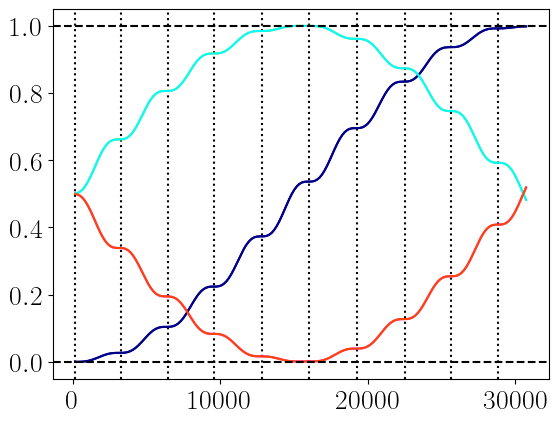

In [ ]:
plt.plot(time_array,Overlap2_GS_NG,label=r"$\mathcal{O}_{n_{\rm g, 1}}$", color="darkblue")
#plt.plot(12814.467020687676,0.14777916105284386, 'ro')
#plt.plot(16146.22844606647,0.22421773197138237, 'ro')
#plt.annotate("", xy=(16146.22844606647, 0.14777916105284386), xytext=(12814.467020687676, 0.14777916105284386), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(12814.467020687676, 0.24777916105284386,r"$\omega_2$")
#plt.plot(19221.700531031514,0.31124743468783095, 'ro')
#plt.annotate("", xy=(19221.700531031514, 0.22421773197138237), xytext=(16146.22844606647, 0.22421773197138237), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(16146.22844606647, 0.32421773197138237,r"$\omega_1$")
#plt.axvline(170.85956027583566, color='black', linestyle='dotted')
#plt.plot(22553.46195641031,0.405687137182611, 'ro')
#plt.annotate("", xy=(22553.46195641031, 0.31124743468783095), xytext=(19221.700531031514, 0.31124743468783095), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(19221.700531031514, 0.41124743468783095,r"$\omega_2$")
#plt.axvline(3246.3316452408776, color='black', linestyle='dotted')
#plt.plot(25628.934041375353,0.5037498148895604, 'ro')
#plt.annotate("", xy=(25628.934041375353, 0.405687137182611), xytext=(22553.46195641031, 0.405687137182611), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(22553.46195641031, 0.505687137182611,r"$\omega_1$")
#plt.axvline(6492.663290481755, color='black', linestyle='dotted')
#plt.plot(28960.695466754147,0.6016795255624605, 'ro')
#plt.annotate("", xy=(28960.695466754147, 0.5037498148895604), xytext=(25628.934041375353, 0.5037498148895604), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(25628.934041375353, 0.6037498148895604,r"$\omega_2$")
#plt.axvline(9568.135375446798, color='black', linestyle='dotted')
#plt.plot(32036.167551719187,0.6956771895474363, 'ro')
#plt.annotate("", xy=(32036.167551719187, 0.6016795255624605), xytext=(28960.695466754147, 0.6016795255624605), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(28960.695466754147, 0.7016795255624605,r"$\omega_1$")
#plt.axvline(12814.467020687674, color='black', linestyle='dotted')
#plt.plot(35367.92897709798,0.7820428041370546, 'ro')
#plt.annotate("", xy=(35367.92897709798, 0.6956771895474363), xytext=(32036.167551719187, 0.6956771895474363), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(32036.167551719187, 0.7956771895474363,r"$\omega_2$")
#plt.axvline(16060.798665928553, color='black', linestyle='dotted')
#plt.plot(38699.69040247678,0.8575615690874825, 'ro')
#plt.annotate("", xy=(38699.69040247678, 0.7820428041370546), xytext=(35367.92897709798, 0.7820428041370546), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(35367.92897709798, 0.8820428041370546,r"$\omega_2$")
#plt.axvline(19307.13031116943, color='black', linestyle='dotted')

plt.plot(time_array,Overlap2_GS_NG_comparison_phi0,label=r"$\mathcal{O}_{\varphi_{\rm ext, 0} } $" , color= "yellowgreen")
#plt.plot(256.2893404137535,0.5009500341989357, 'ro')
#plt.axvline(22553.46195641031, color='black', linestyle='dotted')
#plt.plot(3331.7614253787956,0.5982068469070521, 'ro')
#plt.annotate("", xy=(3331.7614253787956, 0.5009500341989357), xytext=(256.2893404137535, 0.5009500341989357), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(256.2893404137535, 0.5209500341989357,r"$\omega_1$")
#plt.axvline(25628.93404137535, color='black', linestyle='dotted')
#print(3331.7614253787956-256.2893404137535)
#plt.plot(6407.233510343838,0.6922207364876315, 'ro')
#plt.annotate("", xy=(6407.233510343838, 0.5982068469070521), xytext=(3331.7614253787956, 0.5982068469070521), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(3331.7614253787956, 0.6182068469070521,r"$\omega_1$")
#plt.axvline(28875.26568661623, color='black', linestyle='dotted')
#print(6407.233510343838-3331.7614253787956)
#plt.plot(9738.994935722634,0.7790707238522113, 'ro')
#plt.annotate("", xy=(9738.994935722634, 0.6922207364876315), xytext=(6407.233510343838, 0.6922207364876315), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(6407.233510343838, 0.7122207364876315,r"$\omega_2$")
#plt.axvline(32103.612114985965, color='black', linestyle='dotted')
#print(9738.994935722634-6407.233510343838)
#plt.plot(12814.467020687676,0.8548808348604641, 'ro')
#plt.annotate("", xy=(12814.467020687676, 0.7790707238522113), xytext=(9738.994935722634, 0.7790707238522113), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(9738.994935722634, 0.7990707238522113,r"$\omega_1$")
#plt.axvline(35502.818103631536, color='black', linestyle='dotted')
#print(12814.467020687676-9738.994935722634)
#plt.plot(16146.22844606647,0.9170677620336155, 'ro')
#plt.annotate("", xy=(16146.22844606647, 0.8548808348604641), xytext=(12814.467020687676, 0.8548808348604641), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(12814.467020687676, 0.8748808348604641,r"$\omega_2$")
#plt.axvline(38750.94827055953, color='black', linestyle='dotted')
#plt.axvline(41749.53355340045, color='black', linestyle='dotted')
#plt.axvline(45209.43964898612, color='black', linestyle='dotted')
#print(3246.3316452408776-170.85956027583566)
#print(6492.663290481755-3246.3316452408776)
#print(9568.135375446798-6492.663290481755)
#print(12814.467020687674-9568.135375446798)
#print(16060.798665928553-12814.467020687674)
#print(19307.13031116943-16060.798665928553)
#print(22553.46195641031-19307.13031116943)
#print(25628.93404137535-22553.46195641031)
#print(28875.26568661623-25628.93404137535)
plt.plot(time_array,Overlap2_GS_NG_comparison_phi2,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} } $" , color="magenta")
#plt.plot(256.2893404137535,0.49902632110672973, 'ro')
#plt.plot(3331.7614253787956,0.40177043935925943, 'ro')
#plt.plot(6407.233510343838,0.3077591192218341, 'ro')
#plt.plot(9738.994935722634,0.22091301699160001, 'ro')
#plt.plot(12814.467020687676,0.14510739079964122, 'ro')
#plt.plot(16146.22844606647,0.08292496571264842, 'ro')
plt.plot(time_array,Overlap2_GS_PHIEXT,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} }$", color="darkblue")
plt.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng0,label=r"$\mathcal{O}_{n_{\rm g,0} } $" , color= "cyan")
plt.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng2,label=r"$\mathcal{O}_{n_{\rm g,1} } $" , color="orangered")
plt.axhline(1, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
#plt.savefig('T_EVOL_T30_INVGAP_Nt120_NG_PHIEXT_M20N50_EG_1_alloverlapsandfreqs.png',dpi=300,bbox_inches='tight')
plt.show()

3075.472084965042
3075.4720849650425
3331.761425378796
3075.472084965042
3331.7614253787942
3075.472084965044
3331.7614253787942
3075.472084965044
3331.7614253787942
3075.4720849650403
3331.7614253787942
3331.761425378798


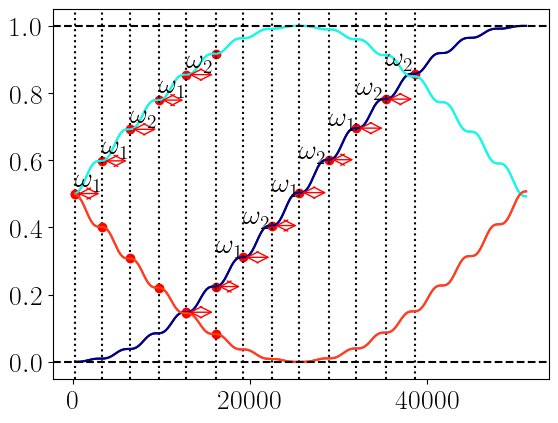

In [226]:
plt.plot(time_array,Overlap2_GS_NG,label=r"$\mathcal{O}_{n_{\rm g, 1}}$", color="darkblue")
plt.plot(12814.467020687676,0.14777916105284386, 'ro')
plt.plot(16146.22844606647,0.22421773197138237, 'ro')
plt.annotate("", xy=(16146.22844606647, 0.14777916105284386), xytext=(12814.467020687676, 0.14777916105284386), arrowprops=dict(arrowstyle='<->', color="red"))
#plt.text(12814.467020687676, 0.24777916105284386,r"$\omega_2$")
plt.plot(19221.700531031514,0.31124743468783095, 'ro')
plt.annotate("", xy=(19221.700531031514, 0.22421773197138237), xytext=(16146.22844606647, 0.22421773197138237), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(16146.22844606647, 0.32421773197138237,r"$\omega_1$")
plt.axvline(19221.700531031514, color='black', linestyle='dotted')
plt.plot(22553.46195641031,0.405687137182611, 'ro')
plt.annotate("", xy=(22553.46195641031, 0.31124743468783095), xytext=(19221.700531031514, 0.31124743468783095), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(19221.700531031514, 0.41124743468783095,r"$\omega_2$")
plt.axvline(22553.46195641031, color='black', linestyle='dotted')
plt.plot(25628.934041375353,0.5037498148895604, 'ro')
plt.annotate("", xy=(25628.934041375353, 0.405687137182611), xytext=(22553.46195641031, 0.405687137182611), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(22553.46195641031, 0.505687137182611,r"$\omega_1$")
plt.axvline(25628.934041375353, color='black', linestyle='dotted')
plt.plot(28960.695466754147,0.6016795255624605, 'ro')
plt.annotate("", xy=(28960.695466754147, 0.5037498148895604), xytext=(25628.934041375353, 0.5037498148895604), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(25628.934041375353, 0.6037498148895604,r"$\omega_2$")
plt.axvline(28960.695466754147, color='black', linestyle='dotted')
plt.plot(32036.167551719187,0.6956771895474363, 'ro')
plt.annotate("", xy=(32036.167551719187, 0.6016795255624605), xytext=(28960.695466754147, 0.6016795255624605), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(28960.695466754147, 0.7016795255624605,r"$\omega_1$")
plt.axvline(32036.167551719187, color='black', linestyle='dotted')
plt.plot(35367.92897709798,0.7820428041370546, 'ro')
plt.annotate("", xy=(35367.92897709798, 0.6956771895474363), xytext=(32036.167551719187, 0.6956771895474363), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(32036.167551719187, 0.7956771895474363,r"$\omega_2$")
plt.axvline(35367.92897709798, color='black', linestyle='dotted')
plt.plot(38699.69040247678,0.8575615690874825, 'ro')
plt.annotate("", xy=(38699.69040247678, 0.7820428041370546), xytext=(35367.92897709798, 0.7820428041370546), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(35367.92897709798, 0.8820428041370546,r"$\omega_2$")
plt.axvline(38699.69040247678, color='black', linestyle='dotted')

plt.plot(time_array,Overlap2_GS_NG_comparison_phi0,label=r"$\mathcal{O}_{\varphi_{\rm ext, 0} } $" , color= "yellowgreen")
plt.plot(256.2893404137535,0.5009500341989357, 'ro')
plt.axvline(256.2893404137535, color='black', linestyle='dotted')
plt.plot(3331.7614253787956,0.5982068469070521, 'ro')
plt.annotate("", xy=(3331.7614253787956, 0.5009500341989357), xytext=(256.2893404137535, 0.5009500341989357), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(256.2893404137535, 0.5209500341989357,r"$\omega_1$")
plt.axvline(3331.7614253787956, color='black', linestyle='dotted')
print(3331.7614253787956-256.2893404137535)
plt.plot(6407.233510343838,0.6922207364876315, 'ro')
plt.annotate("", xy=(6407.233510343838, 0.5982068469070521), xytext=(3331.7614253787956, 0.5982068469070521), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(3331.7614253787956, 0.6182068469070521,r"$\omega_1$")
plt.axvline(6407.233510343838, color='black', linestyle='dotted')
print(6407.233510343838-3331.7614253787956)
plt.plot(9738.994935722634,0.7790707238522113, 'ro')
plt.annotate("", xy=(9738.994935722634, 0.6922207364876315), xytext=(6407.233510343838, 0.6922207364876315), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(6407.233510343838, 0.7122207364876315,r"$\omega_2$")
plt.axvline(9738.994935722634, color='black', linestyle='dotted')
print(9738.994935722634-6407.233510343838)
plt.plot(12814.467020687676,0.8548808348604641, 'ro')
plt.annotate("", xy=(12814.467020687676, 0.7790707238522113), xytext=(9738.994935722634, 0.7790707238522113), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(9738.994935722634, 0.7990707238522113,r"$\omega_1$")
plt.axvline(12814.467020687676, color='black', linestyle='dotted')
print(12814.467020687676-9738.994935722634)
plt.plot(16146.22844606647,0.9170677620336155, 'ro')
plt.annotate("", xy=(16146.22844606647, 0.8548808348604641), xytext=(12814.467020687676, 0.8548808348604641), arrowprops=dict(arrowstyle='<->', color="red"))
plt.text(12814.467020687676, 0.8748808348604641,r"$\omega_2$")
plt.axvline(16146.22844606647, color='black', linestyle='dotted')
print(16146.22844606647-12814.467020687676)
print(19221.700531031514-16146.22844606647)
print(22553.46195641031-19221.700531031514)
print(25628.934041375353-22553.46195641031)
print(28960.695466754147-25628.934041375353)
print(32036.167551719187-28960.695466754147)
print(35367.92897709798-32036.167551719187)
print(38699.69040247678-35367.92897709798)
plt.plot(time_array,Overlap2_GS_NG_comparison_phi2,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} } $" , color="magenta")
plt.plot(256.2893404137535,0.49902632110672973, 'ro')
plt.plot(3331.7614253787956,0.40177043935925943, 'ro')
plt.plot(6407.233510343838,0.3077591192218341, 'ro')
plt.plot(9738.994935722634,0.22091301699160001, 'ro')
plt.plot(12814.467020687676,0.14510739079964122, 'ro')
plt.plot(16146.22844606647,0.08292496571264842, 'ro')
plt.plot(time_array,Overlap2_GS_PHIEXT,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} }$", color="darkblue")
plt.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng0,label=r"$\mathcal{O}_{n_{\rm g,0} } $" , color= "cyan")
plt.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng2,label=r"$\mathcal{O}_{n_{\rm g,1} } $" , color="orangered")
plt.axhline(1, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
#plt.savefig('T_EVOL_T100_INVGAP_Nt200_NG_PHIEXT_M20N50_EG_1_alloverlapsandfreqs.png',dpi=300,bbox_inches='tight')
plt.show()

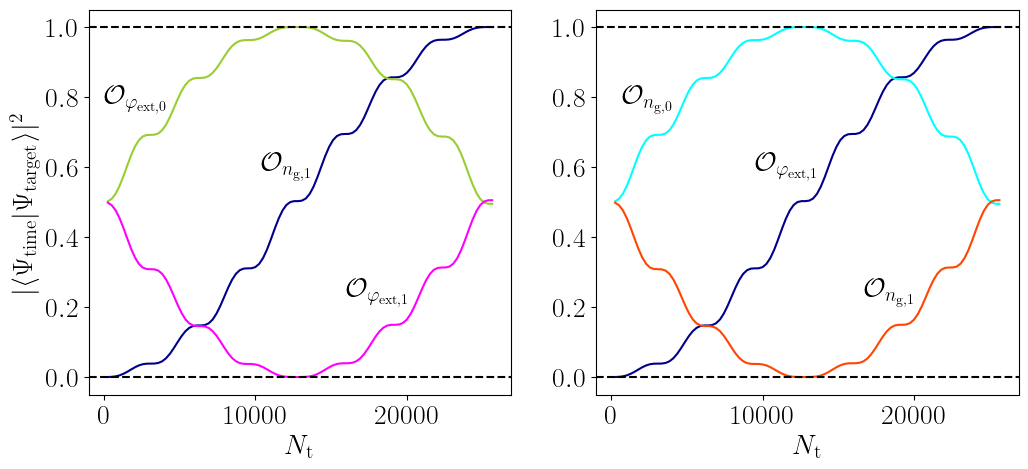

In [ ]:
#Ovrlap2_GS_NG = np.array(Overlap2_GS_NG)
#np.save('T_EVOL_T5_5_INVGAP_Nt1000_NG_M20N50_EG_1.npy', Ovrlap2_GS_NG)
#Ovrlap2_GS_PHIEXT= np.array(Overlap2_GS_PHIEXT)
#np.save('T_EVOL_T5_5_INVGAP_Nt1000_PHIEXT_M20N50_EG_1.npy', Ovrlap2_GS_PHIEXT)
fig=plt.figure(figsize=(12,5))

ax1=fig.add_subplot(121)
ax1.plot(time_array,Overlap2_GS_NG,label=r"$\mathcal{O}_{n_{\rm g, 1}}$", color="darkblue")
ax1.plot(time_array,Overlap2_GS_NG_comparison_phi0,label=r"$\mathcal{O}_{\varphi_{\rm ext, 0} } $" , color= "yellowgreen")
ax1.plot(time_array,Overlap2_GS_NG_comparison_phi2,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} } $" , color="magenta")
ax1.set_xlabel(r"$N_{\rm t}$")
ax1.axhline(1, color='black', linestyle='--')
ax1.axhline(0, color='black', linestyle='--')
#ax1.legend(bbox_to_anchor=(0.15,1.0),ncol=1)
ax1.set_ylabel(r"$| \langle \Psi_{\rm time} | \Psi_{\rm target} \rangle |^2$")
ax1.text(0,0.78,r"$\mathcal{O}_{\varphi_{\rm ext, 0} } $")
ax1.text(10400,0.59,r"$\mathcal{O}_{n_{\rm g, 1}}$")
ax1.text(16000,0.23,r"$\mathcal{O}_{\varphi_{\rm ext, 1} } $")

ax2=fig.add_subplot(122)
ax2.plot(time_array,Overlap2_GS_PHIEXT,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} }$", color="darkblue")
ax2.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng0,label=r"$\mathcal{O}_{n_{\rm g,0} } $" , color= "cyan")
ax2.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng2,label=r"$\mathcal{O}_{n_{\rm g,1} } $" , color="orangered")
ax2.set_xlabel(r"$N_{\rm t}$")
ax2.axhline(1, color='black', linestyle='--')
ax2.axhline(0, color='black', linestyle='--')
#ax2.legend(bbox_to_anchor=(0.15,1.0),ncol=1)
ax2.text(700,0.78,r"$\mathcal{O}_{n_{\rm g, 0}} $")
ax2.text(9500,0.59,r"$\mathcal{O}_{\varphi_{\rm ext, 1} }$")
ax2.text(16700,0.23,r"$\mathcal{O}_{n_{\rm g, 1}} $")

fig.subplots_adjust(wspace=0.2)
#plt.savefig('T_EVOL_T55_INVGAP_Nt100_NG_PHIEXT_M20N50_EG_1_PRUEBATRAYECTORIA.png',dpi=300,bbox_inches='tight')
plt.show()

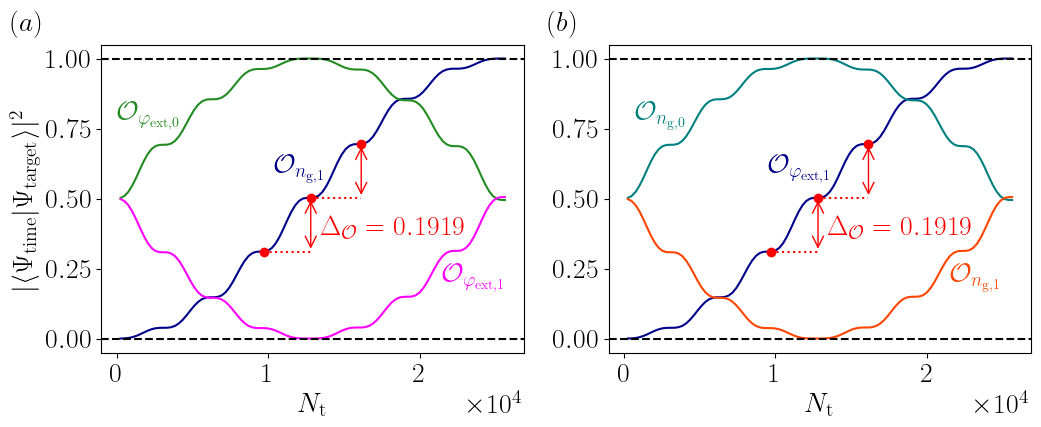

In [148]:
fig=plt.figure(figsize=(12,4))

ax1=fig.add_subplot(121)
ax1.plot(time_array,Overlap2_GS_NG,label=r"$\mathcal{O}_{n_{\rm g, 1}}$", color="darkblue")
ax1.plot(time_array,Overlap2_GS_NG_comparison_phi0,label=r"$\mathcal{O}_{\varphi_{\rm ext, 0} } $" , color= "forestgreen")
ax1.plot(time_array,Overlap2_GS_NG_comparison_phi2,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} } $" , color="magenta")
ax1.set_xlabel(r"$N_{\rm t}$")
ax1.axhline(1, color='black', linestyle='--')
ax1.axhline(0, color='black', linestyle='--')
#ax1.legend(bbox_to_anchor=(0.15,1.0),ncol=1)
ax1.set_ylabel(r"$| \langle \Psi_{\rm time} | \Psi_{\rm target} \rangle |^2$")
ax1.text(0,0.78,r"$\mathcal{O}_{\varphi_{\rm ext, 0} } $", color= "forestgreen")
ax1.text(10400,0.59,r"$\mathcal{O}_{n_{\rm g, 1}}$", color="darkblue")
ax1.text(21500,0.2,r"$\mathcal{O}_{\varphi_{\rm ext, 1} } $", color="magenta")
ax1.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
ax1.text(-7000,1.1,r"$(a)$")
ax1.plot(9738.9949,0.3107359761260982, 'ro')
ax1.plot(12814.4670,0.50257991221575732, 'ro')
ax1.plot(16146.2284,0.6945328989051015, 'ro')
ax1.annotate("", xy=(12814.4670, 0.50257991221575732), xytext=(12814.4670, 0.3107359761260982), arrowprops=dict(arrowstyle='<->', color="red"))
ax1.annotate("", xy=(16146.2284, 0.6945328989051015), xytext=(16146.2284, 0.50257991221575732), arrowprops=dict(arrowstyle='<->', color="red"))
ax1.plot([9738.9949,12814.4670], [0.31070772000691427,0.31070772000691427], 'r:')
ax1.plot([12814.4670,16146.2284], [0.5025822372823341,0.5025822372823341], 'r:')
ax1.text(13500,0.37,r"$\Delta_{\mathcal{O}}=0.1919$",color="red")

ax2=fig.add_subplot(122)
ax2.plot(time_array,Overlap2_GS_PHIEXT,label=r"$\mathcal{O}_{\varphi_{\rm ext, 1} }$", color="darkblue")
ax2.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng0,label=r"$\mathcal{O}_{n_{\rm g,0} } $" , color= "teal")
ax2.plot(time_array,Overlap2_GS_PHIEXT_comparison_ng2,label=r"$\mathcal{O}_{n_{\rm g,1} } $" , color="orangered")
ax2.set_xlabel(r"$N_{\rm t}$")
ax2.axhline(1, color='black', linestyle='--')
ax2.axhline(0, color='black', linestyle='--')
#ax2.legend(bbox_to_anchor=(0.15,1.0),ncol=1)
ax2.text(700,0.78,r"$\mathcal{O}_{n_{\rm g, 0}} $", color= "teal")
ax2.text(9500,0.59,r"$\mathcal{O}_{\varphi_{\rm ext, 1} }$", color="darkblue")
ax2.text(21500,0.2,r"$\mathcal{O}_{n_{\rm g, 1}} $", color="orangered")
ax2.ticklabel_format(style='sci', axis='x', scilimits=(0, 0))
#ax2.xaxis.get_offset_text().set_position((1.1,0))
ax2.text(-5000,1.1,r"$(b)$")
ax2.plot(9738.9949,0.31070772000691427, 'ro')
ax2.plot(12814.4670,0.5025822372823341, 'ro')
ax2.plot(16146.2284,0.6945689429735011, 'ro')
ax2.annotate("", xy=(12814.4670, 0.5025822372823341), xytext=(12814.4670, 0.31070772000691427), arrowprops=dict(arrowstyle='<->', color="red"))
ax2.annotate("", xy=(16146.2284, 0.6945689429735011), xytext=(16146.2284, 0.5025822372823341), arrowprops=dict(arrowstyle='<->', color="red"))
ax2.plot([9738.9949,12814.4670], [0.31070772000691427,0.31070772000691427], 'r:')
ax2.plot([12814.4670,16146.2284], [0.5025822372823341,0.5025822372823341], 'r:')
ax2.text(13500,0.37,r"$\Delta_{\mathcal{O}}=0.1919$",color="red")


fig.subplots_adjust(wspace=0.2)
#plt.savefig('T_EVOL_T55_INVGAP_Nt100_NG_PHIEXT_M20N50_EG_1_alloverlaps.png',dpi=300,bbox_inches='tight')
plt.show()

In [114]:
N12=0.50257991221575732 - 0.3107359761260982
N23=0.6945328989051015 - 0.50257991221575732
N34=0.8562784025907008 - 0.6945328989051015 
P12=0.5025822372823341 - 0.31070772000691427
P23=0.6945689429735011 - 0.5025822372823341
P34=0.8563128613815412 - 0.6945689429735011 
print(N12, N23, N34)
print(P12, P23, P34)
print((N12 + N23)/2)
print((P12 + P23)/2)


0.19184393608965916 0.19195298668934413 0.16174550368559926
0.19187451727541982 0.19198670569116705 0.16174391840804003
0.19189846138950165
0.19193061148329343
